Название: Генератор базы данных Waveform (написано на C)
Ссылка на dataset: http://archive.ics.uci.edu/ml/datasets/Waveform+Database+Generator+%28Version+1%29

Цель: Распознать к какому классу относится волна

Описание задачи:
Имеется 3 класса волн.
Волна строится на основе 21 атрибута.
Значение атрибута - это точки на координатной оси Y. Ось X состоит из значений от 1 до 21.
Таким образом получается график с 21 одной точкой, по которым и определяется класс волны.

In [1]:
import numpy as np
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

Чтение данных из файла

In [2]:
data = pd.read_csv('waveform.csv')
print(data.shape)
data.head()

(5000, 22)


,h1,h2,h3,h4,h5,h6,h7,h8,h9,h10,...,h13,h14,h15,h16,h17,h18,h19,h20,h21,class
0,-1.23,-1.56,-1.75,-0.28,0.60,2.22,0.85,0.21,-0.20,0.89,...,2.89,7.75,4.59,3.15,5.12,3.32,1.20,0.24,-0.56,2
1,-0.69,2.43,0.61,2.08,2.30,3.25,5.52,4.55,2.97,2.22,...,1.24,1.89,1.88,-1.34,0.83,1.41,1.78,0.60,2.42,1
2,-0.12,-0.94,1.29,2.59,2.42,3.55,4.94,3.25,1.90,2.07,...,2.50,0.12,1.41,2.78,0.64,0.62,-0.01,-0.79,-0.12,0
3,0.86,0.29,2.19,-0.02,1.13,2.51,2.37,5.45,5.45,4.84,...,2.58,1.40,1.24,1.41,1.07,-1.43,2.84,-1.18,1.12,1
4,1.16,0.37,0.40,-0.59,2.66,1.00,2.69,4.06,5.34,3.53,...,4.30,1.84,1.73,0.21,-0.18,0.13,-0.21,-0.80,-0.68,1


In [3]:
data.describe()

,h1,h2,h3,h4,h5,h6,h7,h8,h9,h10,...,h13,h14,h15,h16,h17,h18,h19,h20,h21,class
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,...,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,0.005144,0.338746,0.672438,0.991610,1.310888,1.997306,2.661806,2.659228,2.672086,2.988668,...,2.678908,2.648632,2.647668,2.000504,1.335032,1.000622,0.661482,0.357300,-0.021378,1.007800
std,1.010130,1.053657,1.187970,1.415239,1.678291,1.814187,2.015774,1.746067,1.663277,1.531506,...,1.651588,1.760113,2.018768,1.810684,1.669949,1.412815,1.197326,1.081337,0.997064,0.818946
min,-3.340000,-3.250000,-4.200000,-3.840000,-3.480000,-2.760000,-3.320000,-3.520000,-3.380000,-1.790000,...,-2.610000,-2.820000,-2.560000,-2.990000,-3.560000,-4.080000,-3.500000,-3.570000,-3.880000,0.000000
25%,-0.680000,-0.372500,-0.150000,-0.020000,0.037500,0.590000,1.110000,1.390000,1.470000,1.880000,...,1.480000,1.360000,1.120000,0.640000,0.070000,-0.010000,-0.180000,-0.350000,-0.690000,0.000000
50%,0.010000,0.340000,0.660000,0.940000,1.120000,1.860000,2.500000,2.720000,2.810000,3.000000,...,2.830000,2.700000,2.490000,1.820000,1.200000,0.940000,0.620000,0.350000,-0.030000,1.000000
75%,0.690000,1.050000,1.460000,1.970000,2.540000,3.340000,4.210000,3.940000,3.940000,4.080000,...,3.932500,3.980000,4.182500,3.330000,2.532500,1.960000,1.470000,1.072500,0.660000,2.000000
max,3.940000,3.880000,4.720000,5.750000,6.500000,7.620000,8.760000,7.840000,7.900000,7.630000,...,7.500000,7.750000,8.720000,7.860000,6.740000,6.200000,5.280000,4.650000,4.010000,2.000000


На таблице отобразим распределение данных по классам, получили примерно равное разделение на каждый класс.

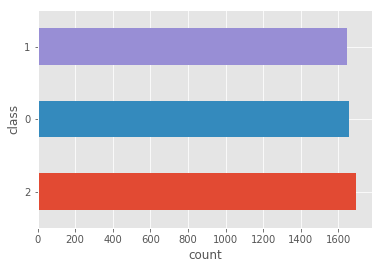

In [18]:
data['class'].value_counts().plot.barh()
plt.xlabel('count')
plt.ylabel('class')
plt.show()

Подготавливаем данные для обучения. В моем dataset содержатся только числовые данные.

In [10]:
X = data.drop(['class'], axis=1)
y = data['class']
print(X.shape, y.shape)

(5000, 21) (5000,)


In [11]:
categorical_columns = [c for c in X.columns if X[c].dtype.name == 'object']
numerical_columns = [c for c in X.columns if X[c].dtype.name != 'object']
print(categorical_columns)
print(numerical_columns)

[]
['h1', 'h2', 'h3', 'h4', 'h5', 'h6', 'h7', 'h8', 'h9', 'h10', 'h11', 'h12', 'h13', 'h14', 'h15', 'h16', 'h17', 'h18', 'h19', 'h20', 'h21']


Числовые данные нормализуем

In [12]:
data_numerical = X[numerical_columns]
data_numerical = (data_numerical - data_numerical.mean(axis=0)) / data_numerical.std(axis=0)

In [13]:
X.describe()

,h1,h2,h3,h4,h5,h6,h7,h8,h9,h10,...,h12,h13,h14,h15,h16,h17,h18,h19,h20,h21
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,...,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,0.005144,0.338746,0.672438,0.991610,1.310888,1.997306,2.661806,2.659228,2.672086,2.988668,...,3.013614,2.678908,2.648632,2.647668,2.000504,1.335032,1.000622,0.661482,0.357300,-0.021378
std,1.010130,1.053657,1.187970,1.415239,1.678291,1.814187,2.015774,1.746067,1.663277,1.531506,...,1.512448,1.651588,1.760113,2.018768,1.810684,1.669949,1.412815,1.197326,1.081337,0.997064
min,-3.340000,-3.250000,-4.200000,-3.840000,-3.480000,-2.760000,-3.320000,-3.520000,-3.380000,-1.790000,...,-1.690000,-2.610000,-2.820000,-2.560000,-2.990000,-3.560000,-4.080000,-3.500000,-3.570000,-3.880000
25%,-0.680000,-0.372500,-0.150000,-0.020000,0.037500,0.590000,1.110000,1.390000,1.470000,1.880000,...,1.920000,1.480000,1.360000,1.120000,0.640000,0.070000,-0.010000,-0.180000,-0.350000,-0.690000
50%,0.010000,0.340000,0.660000,0.940000,1.120000,1.860000,2.500000,2.720000,2.810000,3.000000,...,3.000000,2.830000,2.700000,2.490000,1.820000,1.200000,0.940000,0.620000,0.350000,-0.030000
75%,0.690000,1.050000,1.460000,1.970000,2.540000,3.340000,4.210000,3.940000,3.940000,4.080000,...,4.082500,3.932500,3.980000,4.182500,3.330000,2.532500,1.960000,1.470000,1.072500,0.660000
max,3.940000,3.880000,4.720000,5.750000,6.500000,7.620000,8.760000,7.840000,7.900000,7.630000,...,7.400000,7.500000,7.750000,8.720000,7.860000,6.740000,6.200000,5.280000,4.650000,4.010000


In [19]:
X = pd.DataFrame(data_numerical, dtype = int)
print(X.shape, X.columns)

(5000, 21) Index(['h1', 'h2', 'h3', 'h4', 'h5', 'h6', 'h7', 'h8', 'h9', 'h10', 'h11',
       'h12', 'h13', 'h14', 'h15', 'h16', 'h17', 'h18', 'h19', 'h20', 'h21'],
      dtype='object')


Разделяем данные на два типа: 1 - тренировочные, 2 - тестовые

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Тренировочных: ",X_train.shape)
print("Тестовые: ",X_test.shape)

Тренировочных:  (4000, 21)
Тестовые:  (1000, 21)


### Классификатор k-ближайших соседей

In [22]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

Подсчет и вывод ошибки на тренировочных и тестовых данных.

In [23]:
y_train_predict = knn.predict(X_train)
y_test_predict = knn.predict(X_test)

err_train = np.mean(y_train != y_train_predict)
err_test = np.mean(y_test != y_test_predict)

print("Ошибка на тренировочных: ", err_train)
print("Ошибка на тестовых: ", err_test)

Ошибка на тренировочных:  0.168
Ошибка на тестовых:  0.253


Применим метод кросс-валидации

In [24]:
from sklearn.model_selection import GridSearchCV
nnb = [50, 55, 60, 65, 70, 75]
knn = KNeighborsClassifier()
grid = GridSearchCV(knn, param_grid={'n_neighbors': nnb}, cv=5)
grid.fit(X_train, y_train)

best_cv_err = 1 - grid.best_score_
best_n_neighbors = grid.best_estimator_.n_neighbors
print(best_cv_err, best_n_neighbors)

0.21299999999999997 55


В результате получили, что оптимальное количество соседей = 55

Проверим какие результаты выдаст классификатор k-ближайших соседей с заданным (оптимальным) количеством соседей:

In [25]:
knn = KNeighborsClassifier(n_neighbors=best_n_neighbors)
knn.fit(X_train, y_train)

err_train = np.mean(y_train != knn.predict(X_train))
err_test  = np.mean(y_test  != knn.predict(X_test))

print("Ошибка на тренировочных: ", err_train)
print("Ошибка на тестовых: ", err_test)

Ошибка на тренировочных:  0.2015
Ошибка на тестовых:  0.203


В результе получили, что ошибка на тренировочных и тестовых данных будет примерно 20%

### Классификатор Нейронная сеть

In [26]:
from sklearn.neural_network import MLPClassifier
mlp_model = MLPClassifier(hidden_layer_sizes=(200,), solver='adam', activation='relu', random_state=42, max_iter=300)
mlp_model.fit(X_train, y_train)

/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(200,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=300, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=42, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

Подсчет и вывод ошибки на тренировочных и тестовых данных. Результат: переобучение.

In [30]:
y_train_pred = mlp_model.predict(X_train)
y_test_pred = mlp_model.predict(X_test)

print("Ошибка на тренировочных: ", np.mean(y_train != y_train_pred))
print("Ошибка на тестовых: ", np.mean(y_test != y_test_pred))

Ошибка на тренировочных:  0.01425
Ошибка на тестовых:  0.225


Проведем эксперементы с разными видами решателями (solvers), функциями активации (activations) и размерами слоя (layer_sizes). Определим оптимальные параметры.

In [31]:
solvers = ['lbfgs', 'sgd', 'adam']
activations = ['identity', 'logistic', 'tanh', 'relu']
layer_sizes = [1, 2, 5, 10, 20, 50, 100, 200]

min_test_error = 1
results = []

for solver in solvers:
    for act in activations:
        for size in layer_sizes:
            if solver is 'adam':
                mlp_model = MLPClassifier(hidden_layer_sizes=(size,), solver=solver, activation=act, random_state=42, max_iter=300)
            else:
                mlp_model = MLPClassifier(hidden_layer_sizes=(size,), solver=solver, activation=act, random_state=42)
            mlp_model.fit(X_train, y_train)
            y_train_pred = mlp_model.predict(X_train)
            y_test_pred = mlp_model.predict(X_test)
            
            train_error = np.mean(y_train != y_train_pred)
            test_error = np.mean(y_test != y_test_pred)
            if test_error < min_test_error:
                min_test_error = test_error
                results.clear()
                results.append([solver, act, size, train_error, test_error])

print(results)            

/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/ana

/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/ana

[['sgd', 'identity', 2, 0.18525, 0.171]]


/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Будем использовать полученные оптимальные значения

In [32]:
alpha_arr = np.logspace(-5, 10, 21)
test_err = []
train_err = []
for alpha in alpha_arr:
    mlp_model = MLPClassifier(alpha=alpha, hidden_layer_sizes=(2,), solver='sgd', 
                              activation='identity', random_state=42)
    mlp_model.fit(X_train, y_train)

    y_train_pred = mlp_model.predict(X_train)
    y_test_pred = mlp_model.predict(X_test)
    train_err.append(np.mean(y_train != y_train_pred))
    test_err.append(np.mean(y_test != y_test_pred))

/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:230: RuntimeWarning: overflow encountered in double_scalars
  loss += (0.5 * self.alpha) * values / n_samples
/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:28: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims, initial)
/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_base.py:91: RuntimeWarning: overflow encountered in subtract
  tmp = X - X.max(axis=1)[:, np.newaxis]
/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_base.py:91: RuntimeWarning: invalid value encountered in subtract
  tmp = X - X.max(axis=1)[:, np.newaxis]
/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/nu

Построим график зависимости от alpha

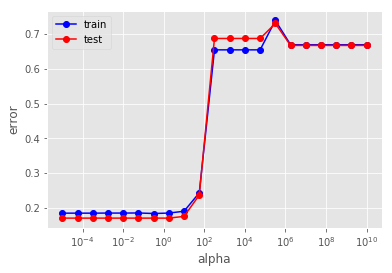

In [33]:
plt.semilogx(alpha_arr, train_err, 'b-o', label='train')
plt.semilogx(alpha_arr, test_err, 'r-o', label='test')
plt.xlabel('alpha')
plt.ylabel('error')
plt.legend()
pass

Найдем оптимальные значения alpha

In [34]:
alpha_opt = alpha_arr[test_err == np.min(test_err)]
print(alpha_opt)

[1.00000000e-05 5.62341325e-05 3.16227766e-04 1.77827941e-03
 1.00000000e-02 5.62341325e-02 3.16227766e-01 1.77827941e+00]


In [35]:
mlp_model = MLPClassifier(alpha=alpha_opt[0], hidden_layer_sizes=(2,), solver='sgd', 
                              activation='identity', random_state=42)
mlp_model.fit(X_train, y_train)

y_train_pred = mlp_model.predict(X_train)
y_test_pred = mlp_model.predict(X_test)

print("Ошибка на тренировочных: ", np.mean(y_train != y_train_pred))
print("Ошибка на тестовых: ", np.mean(y_test != y_test_pred))

Ошибка на тренировочных:  0.18525
Ошибка на тестовых:  0.171


В результате работы метода получили снижение ошибки до 18.5% на тренировочных данных и до 17% на тестовых, небольшой успех, по сравнению с предыдущим методом. Забегая в перед, скажем, что ошибка на тестовых данных в этом методе является минимальной, среди всех других методов.

### Классификатор Random Forest

In [36]:
from sklearn import ensemble
rf = ensemble.RandomForestClassifier(n_estimators=10)
rf.fit(X_train, y_train)

err_train = np.mean(y_train != rf.predict(X_train))
err_test = np.mean(y_test != rf.predict(X_test))

print("Ошибка на тренировочных: ", err_train)
print("Ошибка на тестовых: ", err_test)

Ошибка на тренировочных:  0.014
Ошибка на тестовых:  0.232


Переобучение!

/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:458: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:463: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:458: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:463: RuntimeWarning: divide by zero encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:463: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1

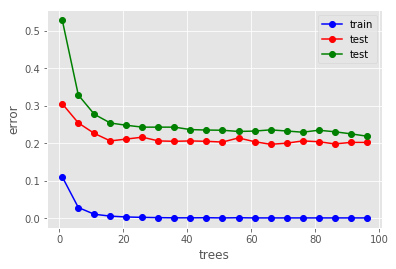

In [37]:
trees_arr = np.arange(1, 100, 5)
test_err = []
train_err = []
oob_err = []

for tree in trees_arr:
    rf = ensemble.RandomForestClassifier(n_estimators=tree, oob_score=True)
    rf.fit(X_train, y_train)
    y_train_pred = rf.predict(X_train)
    y_test_pred = rf.predict(X_test)
    train_err.append(np.mean(y_train != y_train_pred))
    test_err.append(np.mean(y_test != y_test_pred))
    oob_err.append(1 - rf.oob_score_)
    
plt.plot(trees_arr, train_err, 'b-o', label='train')
plt.plot(trees_arr, test_err, 'r-o', label='test')
plt.plot(trees_arr, oob_err, 'g-o', label='test')
plt.xlabel('trees')
plt.ylabel('error')
plt.legend()
plt.show()

В результате работы классифакатора получили переобучение. Переходим к следующему классификатору.

### Классификатор Extra Trees

In [62]:
ert = ensemble.ExtraTreesClassifier(n_estimators = 10)
ert.fit(X_train, y_train)

ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=None, max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [63]:
err_train = np.mean(y_train != ert.predict(X_train))
err_test  = np.mean(y_test  != ert.predict(X_test))

print("Ошибка на обучающей выборке: ", err_train)
print("Ошибка на тестовой выборке: ", err_test)

Ошибка на обучающей выборке:  0.00075
Ошибка на тестовой выборке:  0.234


/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:458: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:463: RuntimeWarning: divide by zero encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:463: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:458: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:463: RuntimeWarning: divide by zero encountered in true_divide
  predictions[k].sum(axis=

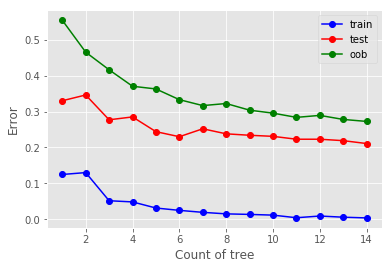

In [64]:
trees_arr = np.arange(1, 15, 1)
test_err = []
train_err = []
oob_err = []
for tree in trees_arr:
    ert = ensemble.ExtraTreesClassifier(n_estimators=tree, oob_score=True, bootstrap=True)
    ert.fit(X_train, y_train)
    train_err.append(np.mean(y_train != ert.predict(X_train)))
    test_err.append(np.mean(y_test != ert.predict(X_test)))
    oob_err.append(1 - ert.oob_score_)

plt.plot(trees_arr, train_err, 'b-o', label='train')
plt.plot(trees_arr, test_err, 'r-o', label='test')
plt.plot(trees_arr, oob_err, 'g-o', label='oob')
plt.xlabel('Count of tree')
plt.ylabel('Error')
plt.legend()
pass

В результате работы классифакатора получили переобучение.

In [65]:
min_train_err = np.min(train_err)
min_test_err = np.min(test_err)

print("Мин ошибка на тренировочных: ", min_train_err)
print("Мин ошибка на тестовых: ", min_test_err)

Мин ошибка на тренировочных:  0.00425
Мин ошибка на тестовых:  0.211


## Классификатор Ada Boost

In [48]:
ab = ensemble.AdaBoostClassifier(n_estimators = 10)
ab.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=10, random_state=None)

In [49]:
err_train = np.mean(y_train != ab.predict(X_train))
err_test  = np.mean(y_test  != ab.predict(X_test))

print("Ошибка на тренировочных: ", err_train)
print("Ошибка на тестовых: ", err_test)

Ошибка на тренировочных:  0.262
Ошибка на тестовых:  0.246


Переобучения нет, построим графики

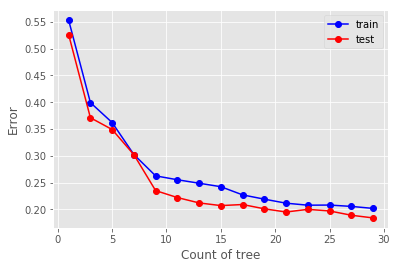

In [53]:
estimator_arr = np.arange(1, 30, 2)
test_err = []
train_err = []
for estimator in estimator_arr:
    ab = ensemble.AdaBoostClassifier(n_estimators=estimator)
    ab.fit(X_train, y_train)
    train_err.append(np.mean(y_train != ab.predict(X_train)))
    test_err.append(np.mean(y_test != ab.predict(X_test)))
    
plt.plot(estimator_arr, train_err, 'b-o', label='train')
plt.plot(estimator_arr, test_err, 'r-o', label='test')
plt.xlabel('Count of tree')
plt.ylabel('Error')
plt.legend()
pass

In [54]:
min_train_err = np.min(train_err)
min_test_err = np.min(test_err)

print("Мин ошибка на тренировочных: ", min_train_err)
print("Мин ошибка на тестовых: ", min_test_err)

Мин ошибка на тренировочных:  0.20175
Мин ошибка на тестовых:  0.184


## Классификатор Gradient Boosting Classifier

In [56]:
gbt = ensemble.GradientBoostingClassifier(n_estimators = 10)
gbt.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=10,
              n_iter_no_change=None, presort='auto', random_state=None,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [58]:
err_train = np.mean(y_train != gbt.predict(X_train))
err_test  = np.mean(y_test  != gbt.predict(X_test))

print("Ошибка на тренировочных: ", err_train)
print("Ошибка на тестовых: ", err_test)

Ошибка на тренировочных:  0.21025
Ошибка на тестовых:  0.208


Переобучения нет, построим график

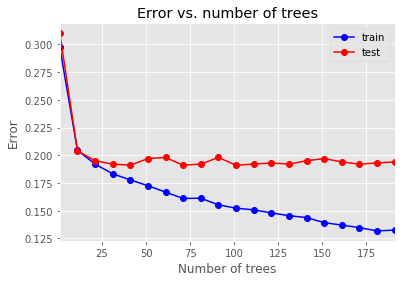

In [59]:
tree_arr = np.arange(1, 200, 10)
test_err = []
train_err = []
for tree in tree_arr:
    gbt = ensemble.GradientBoostingClassifier(n_estimators=tree)
    gbt.fit(X_train, y_train)
    
    y_train_pred = gbt.predict(X_train)
    y_test_pred = gbt.predict(X_test)
    train_err.append(np.mean(y_train != y_train_pred))
    test_err.append(np.mean(y_test != y_test_pred))


plt.plot(tree_arr, train_err, 'b-o', label = 'train')
plt.plot(tree_arr, test_err, 'r-o', label = 'test')
plt.xlim([np.min(tree_arr), np.max(tree_arr)])
plt.title('Error vs. number of trees')
plt.xlabel('Number of trees')
plt.ylabel('Error')
plt.legend()
pass

In [60]:
min_train_err = np.min(train_err)
min_test_err = np.min(test_err)

print("Мин ошибка на тренировочных: ", min_train_err)
print("Мин ошибка на тестовых: ", min_test_err)

Мин ошибка на тренировочных:  0.13175
Мин ошибка на тестовых:  0.191


Чуть-чуть не хватило, но все таки самой минимальной ошибкой на тестовых данных является результат 17% в классификаторе Нейронная сеть.

## Principal Components Analysis

При помощи метода PCA (главных компонен) уменьшаем размерность данных

In [66]:
X.shape

(5000, 21)

Начальные данные имеют 21 столбец

In [67]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 7)
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=7, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

Уменьшил размерность данных до 7

In [70]:
X_PCA = pca.transform(X)

In [71]:
pca_x_train = pca.transform(X_train)
pca_x_test = pca.transform(X_test)
pca_x_train.shape
pca_x_test.shape

(1000, 7)

Делим данные на два типа: 1. Тренировочные 2.Тестовые
Тестовые данные будут содержать 30%

In [79]:
X_train, X_test, y_train, y_test = train_test_split(X_PCA, y, test_size = 0.3, random_state = 42)

mlp_model = MLPClassifier(hidden_layer_sizes=(200,), solver='adam', activation='relu', random_state=42, max_iter=300)
mlp_model.fit(X_train, y_train)

y_train_pred = mlp_model.predict(X_train)
y_test_pred = mlp_model.predict(X_test)

print("Ошибка на тренировочных: ", np.mean(y_train != y_train_pred))
print("Ошибка на тестовых: ", np.mean(y_test != y_test_pred))

Ошибка на тренировочных:  0.13857142857142857
Ошибка на тестовых:  0.204


/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Полученную ошибку (после уменьшения размерности) сравним с другой ошибкой, полученной до использования PCA на классификаторе Нейронная сеть. Ошибка немного уменьшилась на тестовых данных

In [80]:
solvers = ['lbfgs', 'sgd', 'adam']
activations = ['identity', 'logistic', 'tanh', 'relu']
layer_sizes = [1, 2, 5, 10, 20, 50, 100, 200]

min_test_error = 1
results = []

for solver in solvers:
    for act in activations:
        for size in layer_sizes:
            if solver is 'adam':
                mlp_model = MLPClassifier(hidden_layer_sizes=(size,), solver=solver, activation=act, random_state=42, max_iter=300)
            else:
                mlp_model = MLPClassifier(hidden_layer_sizes=(size,), solver=solver, activation=act, random_state=42)
            mlp_model.fit(X_train, y_train)
            y_train_pred = mlp_model.predict(X_train)
            y_test_pred = mlp_model.predict(X_test)
            
            train_error = np.mean(y_train != y_train_pred)
            test_error = np.mean(y_test != y_test_pred)
            if test_error < min_test_error:
                min_test_error = test_error
                results.clear()
                results.append([solver, act, size, train_error, test_error])

print(results)            

/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/ana

/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/ana

[['adam', 'identity', 50, 0.18542857142857141, 0.196]]


/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [81]:
alpha_arr = np.logspace(-5, 10, 21)
test_err = []
train_err = []
for alpha in alpha_arr:
    mlp_model = MLPClassifier(alpha=alpha, hidden_layer_sizes=(50,), solver='adam', 
                              activation='identity', random_state=42)
    mlp_model.fit(X_train, y_train)

    y_train_pred = mlp_model.predict(X_train)
    y_test_pred = mlp_model.predict(X_test)
    train_err.append(np.mean(y_train != y_train_pred))
    test_err.append(np.mean(y_test != y_test_pred))

Построим график зависимости от альфа

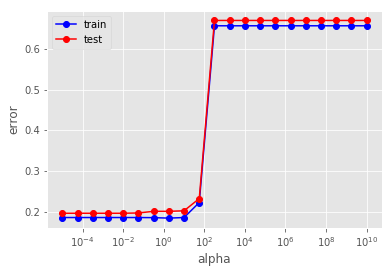

In [82]:
plt.semilogx(alpha_arr, train_err, 'b-o', label='train')
plt.semilogx(alpha_arr, test_err, 'r-o', label='test')
plt.xlabel('alpha')
plt.ylabel('error')
plt.legend()
pass

Найдем оптимальное альфа

In [84]:
alpha_opt = alpha_arr[test_err == np.min(test_err)]
print(alpha_opt)

[1.00000000e-05 5.62341325e-05 3.16227766e-04 1.77827941e-03
 1.00000000e-02]


Вычислим ошибку при оптимальных значениях

In [86]:
mlp_model = MLPClassifier(alpha=alpha_opt[0], hidden_layer_sizes=(50,), solver='sgd', 
                              activation='identity', random_state=42)
mlp_model.fit(X_train, y_train)

y_train_pred = mlp_model.predict(X_train)
y_test_pred = mlp_model.predict(X_test)

print("Ошибка на тренировочных: ", np.mean(y_train != y_train_pred))
print("Ошибка на тестовых: ", np.mean(y_test != y_test_pred))

Ошибка на тренировочных:  0.18542857142857141
Ошибка на тестовых:  0.20066666666666666


Ошибка на тестовых данных не сильно изменилась. Метод PCA не улучшил результат, классификатор Нейронная сеть - хороший!